In [70]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt



In [82]:
standard_sq_er=0
accuracy=0
c_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data=pd.read_csv('iris.data',names=c_names)

label=[]
labels = data['class']
for i in labels:
    if(i =='Iris-setosa'):
        label.append(0)
    elif(i =='Iris-versicolor'):
        label.append(1)
    elif(i =='Iris-virginica'):
        label.append(2)

data = data[['sepal length', 'sepal width', 'petal length', 'petal width']]

train_data = data.values
print(train_data)

print(label)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [72]:
def k_means(data,clusters=3,metric='euclidean',iterations=20):
    r,c=data.shape
    global standard_sq_er
    global accuracy_value 
    distance=np.zeros([r,clusters])
    old_centroids=np.zeros([clusters,c])
    new_centroids=np.zeros([clusters,c])
    np.random.seed(8)
    np.random.RandomState(14)
    random_idx = np.random.permutation(data.shape[0])
    centroids = data[random_idx[:clusters]]
    old_centroids=centroids
    classes=np.zeros(r,)
    groups={}
    for iter in range(iterations):
        for i in range(clusters):
            groups[i]=[]   
        for i in range(r):
            for j in range(len(old_centroids)):
                if(metric=='euclidean'):
                    distance[i][j]=sqrt(np.sum((data[i]-old_centroids[j])*(data[i]-old_centroids[j])))
                elif(metric=='manhattan'):
                    distance[i][j]=np.sum(np.absolute(data[i] - old_centroids[j]))
                elif(metric=='minkowski'):
                    distance[i][j]=minkowski(data[i],old_centroids[j],6)
                elif(metric=='cosine'):
                    distance[i][j]=cosine(data[i],old_centroids[j])    
                    
            classes=np.argmin(distance,axis=1)
        for i in range(len(old_centroids)):
            new_centroids[i]=np.mean(data[classes==i],0)
        old_centroids=new_centroids 
    
    dist=np.zeros([len(data),len(old_centroids)])
    target=[]
    for i in range(len(data)):
        for j in range(len(old_centroids)):
                    dist[i][j]=sqrt(np.sum((data[i]-old_centroids[j])*(data[i]-old_centroids[j])))
        cl=np.argmin(dist[i])
        target.append(cl)
    target=np.asarray(target)
    
    targets=target
    count=0
    global label
    for i in range(len(targets)):
        if(targets[i]==label[i]):
            count+=1
    accuracy_value=(count/len(targets))
    dist = np.zeros(data.shape[0])
    for i in range(clusters):
        dist[targets == i] = np.linalg.norm(data[targets == i] - old_centroids[i], axis=1)
    standard_sq_er=np.sum(np.square(dist))
    
    
    


Accuracy for euclidean distance for multiple values of K 

 for k = 1  the accuracy = 33.333333

 for k = 2  the accuracy = 64.666667

 for k = 3  the accuracy = 88.666667

 for k = 4  the accuracy = 53.333333

 for k = 5  the accuracy = 12.666667

 for k = 6  the accuracy = 30.666667

 for k = 7  the accuracy = 13.333333

 for k = 8  the accuracy = 13.333333

 for k = 9  the accuracy = 13.333333

 for k = 10  the accuracy = 13.333333

Accuracy for Manhattan distance for multiple values of K 

 for k = 1  the accuracy = 33.333333

 for k = 2  the accuracy = 64.666667

 for k = 3  the accuracy = 89.333333

 for k = 4  the accuracy = 54.000000

 for k = 5  the accuracy = 13.333333

 for k = 6  the accuracy = 14.000000

 for k = 7  the accuracy = 12.666667

 for k = 8  the accuracy = 12.666667

 for k = 9  the accuracy = 12.666667

 for k = 10  the accuracy = 12.666667

Accuracy for Minkowski distance for multiple values of K 

 for k = 1  the accuracy = 33.333333

 for k = 2  the accurac

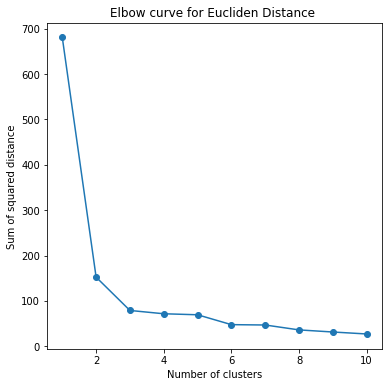

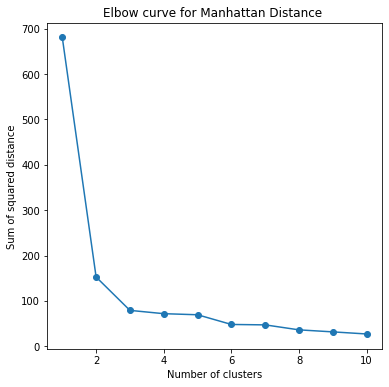

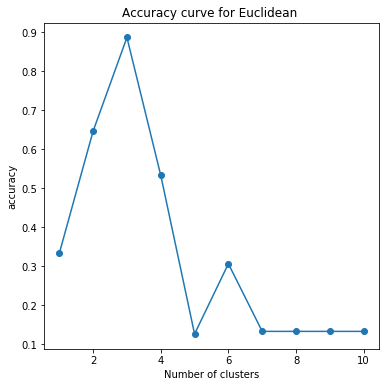

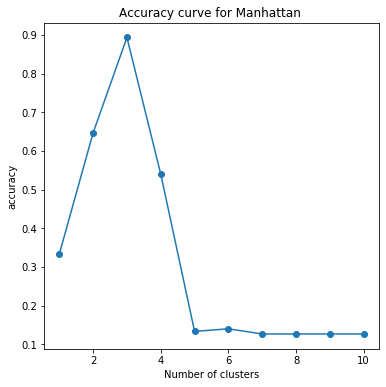

In [89]:
list_of_k = list(range(1, 11))
list_std_sq_error= []
list_std_sq_error_eu= []
list_accuracy=[]
list_accuracy_eu=[]
list_std_sq_error_man= []
list_accuracy_man=[]
print("Accuracy for euclidean distance for multiple values of K ")
for k in list_of_k:
    k_means(train_data,k,'euclidean')
    list_std_sq_error_eu.append(standard_sq_er)  
    print('\n for k = %d  the accuracy = %f' %(k,100*accuracy_value))
    list_accuracy_eu.append(accuracy_value)

    
print("\nAccuracy for Manhattan distance for multiple values of K ")
for k in list_of_k:
    k_means(train_data,k,'manhattan')
    list_std_sq_error_man.append(standard_sq_er)  
    print('\n for k = %d  the accuracy = %f' %(k,100*accuracy_value))
    list_accuracy_man.append(accuracy_value)
    

print("\nAccuracy for Minkowski distance for multiple values of K ")
for k in list_of_k:
    k_means(train_data,k,'minkowski')
    list_std_sq_error.append(standard_sq_er)  
    print('\n for k = %d  the accuracy = %f' %(k,100*accuracy_value))
    list_accuracy.append(accuracy_value)
    
print("\nAccuracy for Cosine distance for multiple values of K ")
for k in list_of_k:
    k_means(train_data,k,'cosine')
    list_std_sq_error.append(standard_sq_er)  
    print('\n for k = %d  the accuracy = %f' %(k,100*accuracy_value))
    list_accuracy.append(accuracy_value)
    
    
plt.figure(figsize=(6, 6))
plt.plot(list_of_k, list_std_sq_error_eu, '-o')

plt.title('Elbow curve for Eucliden Distance ')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');


    
plt.figure(figsize=(6, 6))
plt.plot(list_of_k, list_std_sq_error_man, '-o')

plt.title('Elbow curve for Manhattan Distance ')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

plt.figure(figsize=(6, 6))
plt.plot(list_of_k, list_accuracy_eu, '-o')

plt.title('Accuracy curve for Euclidean ')
plt.xlabel(r'Number of clusters')
plt.ylabel('accuracy');

plt.figure(figsize=(6, 6))
plt.plot(list_of_k, list_accuracy_man, '-o')

plt.title('Accuracy curve for Manhattan ')
plt.xlabel(r'Number of clusters')
plt.ylabel('accuracy');


k_means(train_data[:,[0,1]],3)  
print('\nConsidering 2 features Accuracy= %f' %(100*accuracy_value))


k_means(train_data[:,[0,1,2,3]],3)  
print('\nConsidering all 4 features Accuracy= %f' %(100*accuracy_value))

